#Autism Preprocessing and EDA

In [ ]:
pip install contractions

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import contractions
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
autism_data_raw = pd.read_csv('autism_reply_final_data.csv')

In [ ]:
autism_data = autism_data_raw[['parent_author','parent_body','comment_author','comment_body','final_autism_ind']]
autism_data

,parent_author,parent_body,comment_author,comment_body,final_autism_ind
0,xraysty1e,"I try to stay silent on most topics on here, b...",ManicNoXanax,"same here, mom to autistic almost-9 year old. ...",0
1,pm_me_ur_tigbiddies,"Autistic 19 year old here, I just wanted to sa...",ManicNoXanax,Thank you so much for taking the time to share...,0
2,betherlady,I’m so glad I came across your opinion in this...,ManicNoXanax,"Hey there, I'm glad my words were able to stri...",0
3,pm_me_ur_tigbiddies,You are fucking awesome!,ManicNoXanax,I think YOU'RE fucking awesome. Love hearing t...,0
4,xraysty1e,"I try to stay silent on most topics on here, b...",zorro1701e,My son is 11. He’ll be 12 in July. We suspecte...,1
...,...,...,...,...,...
26529,EarthRevolutionary77,Thank you,zorro1701e,Replying based on this comment. A lot of store...,1
26530,seaotterlover1,Yes! I did an online chat with AT&T two months...,zorro1701e,Former Att employee. With that company ask for...,1
26531,RavingSquirrel11,Dudes need to wash their hands and have good d...,zorro1701e,Honestly I avoid eating spicy food (I’m Mexica...,1
26532,weeping-willa55,"Yes, I did see your comment, Thank you! There’...",zorro1701e,I highly recommend one of the places RIGHT acr...,1


In [ ]:
word_count = []
for i in range(len(autism_data)):
  word_count += [len(autism_data['comment_body'][i].split())]
autism_data['word_count'] = word_count
autism_data

,parent_author,parent_body,comment_author,comment_body,final_autism_ind,word_count
0,xraysty1e,"I try to stay silent on most topics on here, b...",ManicNoXanax,"same here, mom to autistic almost-9 year old. ...",0,290
1,pm_me_ur_tigbiddies,"Autistic 19 year old here, I just wanted to sa...",ManicNoXanax,Thank you so much for taking the time to share...,0,624
2,betherlady,I’m so glad I came across your opinion in this...,ManicNoXanax,"Hey there, I'm glad my words were able to stri...",0,374
3,pm_me_ur_tigbiddies,You are fucking awesome!,ManicNoXanax,I think YOU'RE fucking awesome. Love hearing t...,0,303
4,xraysty1e,"I try to stay silent on most topics on here, b...",zorro1701e,My son is 11. He’ll be 12 in July. We suspecte...,1,284
...,...,...,...,...,...,...
26529,EarthRevolutionary77,Thank you,zorro1701e,Replying based on this comment. A lot of store...,1,218
26530,seaotterlover1,Yes! I did an online chat with AT&T two months...,zorro1701e,Former Att employee. With that company ask for...,1,28
26531,RavingSquirrel11,Dudes need to wash their hands and have good d...,zorro1701e,Honestly I avoid eating spicy food (I’m Mexica...,1,30
26532,weeping-willa55,"Yes, I did see your comment, Thank you! There’...",zorro1701e,I highly recommend one of the places RIGHT acr...,1,64


In [ ]:
autism_data['final_autism_ind_string'] = autism_data['final_autism_ind'].astype(str)

In [ ]:
autism_data_filter_1 = autism_data[autism_data['comment_body'] != '[deleted]']
autism_data_filter_2 = autism_data_filter_1[autism_data_filter_1['comment_body'] != '[removed]']
autism_data_filter_3 = autism_data_filter_2[autism_data_filter_2['parent_body'] != '[deleted]']
autism_data_filter = autism_data_filter_3[autism_data_filter_3['parent_body'] != '[removed]']
autism_data_filter.reset_index(drop=True, inplace=True)
autism_data_filter

,parent_author,parent_body,comment_author,comment_body,final_autism_ind,word_count,final_autism_ind_string
0,xraysty1e,"I try to stay silent on most topics on here, b...",ManicNoXanax,"same here, mom to autistic almost-9 year old. ...",0,290,0
1,pm_me_ur_tigbiddies,"Autistic 19 year old here, I just wanted to sa...",ManicNoXanax,Thank you so much for taking the time to share...,0,624,0
2,betherlady,I’m so glad I came across your opinion in this...,ManicNoXanax,"Hey there, I'm glad my words were able to stri...",0,374,0
3,pm_me_ur_tigbiddies,You are fucking awesome!,ManicNoXanax,I think YOU'RE fucking awesome. Love hearing t...,0,303,0
4,xraysty1e,"I try to stay silent on most topics on here, b...",zorro1701e,My son is 11. He’ll be 12 in July. We suspecte...,1,284,1
...,...,...,...,...,...,...,...
26201,EarthRevolutionary77,Thank you,zorro1701e,Replying based on this comment. A lot of store...,1,218,1
26202,seaotterlover1,Yes! I did an online chat with AT&T two months...,zorro1701e,Former Att employee. With that company ask for...,1,28,1
26203,RavingSquirrel11,Dudes need to wash their hands and have good d...,zorro1701e,Honestly I avoid eating spicy food (I’m Mexica...,1,30,1
26204,weeping-willa55,"Yes, I did see your comment, Thank you! There’...",zorro1701e,I highly recommend one of the places RIGHT acr...,1,64,1


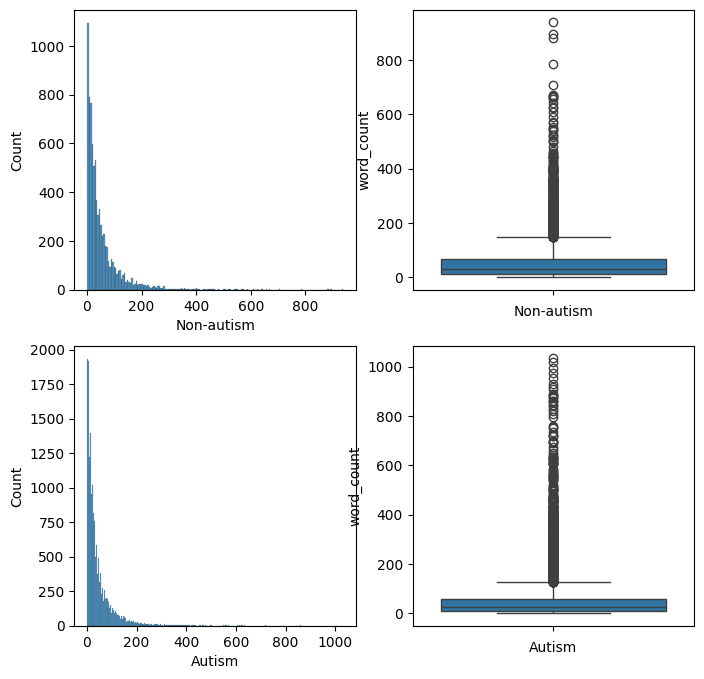

In [ ]:
plt.figure(figsize = (8,8))

plt.subplot(2,2,1)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['word_count'])
plt.xlabel('Non-autism')

plt.subplot(2,2,2)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['word_count'])
plt.xlabel('Non-autism')

plt.subplot(2,2,3)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['word_count'])
plt.xlabel('Autism')

plt.subplot(2,2,4)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['word_count'])
plt.xlabel('Autism')

plt.show()

In [ ]:
autism_data_filter[autism_data_filter['word_count']<2]

,parent_author,parent_body,comment_author,comment_body,final_autism_ind,word_count,final_autism_ind_string
20,cakeisatruth,Let’s talk about ABA therapy. ABA posts outsid...,NaN,https://fortune.com/2022/05/13/autistic-commun...,1,1,1
214,Various-Bend-1865,"Final fantasy, DRPGs, and at the moment Supern...",keldondonovan,DRPGs?,1,1,1
331,Jessibabe333,Dyscalculia gang rise up!,Inevitable_Wolf5866,Yes!!,1,1,1
337,Ok_Rainbows_10101010,What did the spoon ever do to you? Ha,twospiritchaos,Exist!!,1,1,1
355,SacluxGemini,Thank you very much!,imaginechi_reborn,np,1,1,1
...,...,...,...,...,...,...,...
25915,Katviar,yes i just started coffin run and his characte...,whereismydragon,SAAAAAME,1,1,1
26110,East-Base-4356,What is your favorite smell? My favorite smel...,yesimthatvalentine,Lemongrass!,1,1,1
26193,Avalonian_Seeker444,If they came into your house and destroyed you...,zombiebrat,This!!!,1,1,1
26195,NaN,Please make the video. The drama is spread acr...,zombiebrat,Yesss!,1,1,1


In [ ]:
from string import punctuation
wnetl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
parent_body_new = []
comment_body_new = []
for i in range(len(autism_data_filter)):
  parent_lower = autism_data_filter['parent_body'][i].lower()
  comment_lower = autism_data_filter['comment_body'][i].lower()
  parent_cont = nltk.word_tokenize(contractions.fix(parent_lower))
  comment_cont = nltk.word_tokenize(contractions.fix(comment_lower))
  parent_stop = ' '.join([w for w in parent_cont if not w in stop_words])
  comment_stop = ' '.join([w for w in comment_cont if not w in stop_words])
  parent_lemm = ' '.join([wnetl.lemmatize(word) for word in parent_stop.split()])
  comment_lemm = ' '.join([wnetl.lemmatize(word) for word in comment_stop.split()])
  parent_punc = ' '.join([word for word in parent_lemm.split() if word not in punctuation])
  comment_punc = ' '.join([word for word in comment_lemm.split() if word not in punctuation])
  parent_body_new += [parent_punc]
  comment_body_new += [comment_punc]

autism_data_filter['parent_body_new'] = parent_body_new
autism_data_filter['comment_body_new'] = comment_body_new
autism_data_filter

<ipython-input-28-024819561a04>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_data_filter['parent_body_new'] = parent_body_new
<ipython-input-28-024819561a04>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_data_filter['comment_body_new'] = comment_body_new


,parent_author,parent_body,comment_author,comment_body,final_autism_ind,word_count,final_autism_ind_string,parent_body_new,comment_body_new
0,xraysty1e,"I try to stay silent on most topics on here, b...",ManicNoXanax,"same here, mom to autistic almost-9 year old. ...",0,290,0,try stay silent topic personally autism mother...,mom autistic almost-9 year old learn input oft...
1,pm_me_ur_tigbiddies,"Autistic 19 year old here, I just wanted to sa...",ManicNoXanax,Thank you so much for taking the time to share...,0,624,0,autistic 19 year old wanted say give kid oppor...,thank much taking time share thought advice ab...
2,betherlady,I’m so glad I came across your opinion in this...,ManicNoXanax,"Hey there, I'm glad my words were able to stri...",0,374,0,glad came across opinion post son 3 looking wa...,hey glad word able strike chord honestly would...
3,pm_me_ur_tigbiddies,You are fucking awesome!,ManicNoXanax,I think YOU'RE fucking awesome. Love hearing t...,0,303,0,fucking awesome,think fucking awesome love hearing found creat...
4,xraysty1e,"I try to stay silent on most topics on here, b...",zorro1701e,My son is 11. He’ll be 12 in July. We suspecte...,1,284,1,try stay silent topic personally autism mother...,son 11. 12 july suspected something around 2. ...
...,...,...,...,...,...,...,...,...,...
26201,EarthRevolutionary77,Thank you,zorro1701e,Replying based on this comment. A lot of store...,1,218,1,thank,replying based comment lot store nowadays give...
26202,seaotterlover1,Yes! I did an online chat with AT&T two months...,zorro1701e,Former Att employee. With that company ask for...,1,28,1,yes online chat two month ago cancel wifi serv...,former att employee company ask employee id as...
26203,RavingSquirrel11,Dudes need to wash their hands and have good d...,zorro1701e,Honestly I avoid eating spicy food (I’m Mexica...,1,30,1,dude need wash hand good dental hygiene going ...,honestly avoid eating spicy food mexican hopin...
26204,weeping-willa55,"Yes, I did see your comment, Thank you! There’...",zorro1701e,I highly recommend one of the places RIGHT acr...,1,64,1,yes see comment thank many option hard decide ...,highly recommend one place right across street...


In [ ]:
autism_data_filter.to_csv('autism_processed.csv')

In [ ]:
parent_nouns = []
parent_verbs = []
parent_adjectives = []
comment_nouns = []
comment_verbs = []
comment_adjectives = []
for i in range(len(autism_data_filter)):
  pos = nltk.pos_tag(nltk.word_tokenize(autism_data_filter['parent_body_new'][i]))
  noun = 0
  verb = 0
  adj = 0
  for j in range(len(pos)):
    if pos[j][1] == 'NN':
      noun += 1
    elif pos[j][1] == 'VB':
      verb += 1
    elif pos[j][1] == 'JJ':
      adj += 1
  parent_nouns += [noun]
  parent_verbs += [verb]
  parent_adjectives += [adj]
  pos = nltk.pos_tag(nltk.word_tokenize(autism_data_filter['comment_body_new'][i]))
  noun = 0
  verb = 0
  adj = 0
  for j in range(len(pos)):
    if pos[j][1] == 'NN':
      noun += 1
    elif pos[j][1] == 'VB':
      verb += 1
    elif pos[j][1] == 'JJ':
      adj += 1
  comment_nouns += [noun]
  comment_verbs += [verb]
  comment_adjectives += [adj]

autism_data_filter['parent_nouns'] = parent_nouns
autism_data_filter['parent_verbs'] = parent_verbs
autism_data_filter['parent_adjectives'] = parent_adjectives
autism_data_filter['comment_nouns'] = comment_nouns
autism_data_filter['comment_verbs'] = comment_verbs
autism_data_filter['comment_adjectives'] = comment_adjectives
autism_data_filter

<ipython-input-15-d46b1ea172d3>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_data_filter['parent_nouns'] = parent_nouns
<ipython-input-15-d46b1ea172d3>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autism_data_filter['parent_verbs'] = parent_verbs
<ipython-input-15-d46b1ea172d3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,parent_author,parent_body,comment_author,comment_body,final_autism_ind,word_count,final_autism_ind_string,parent_body_new,comment_body_new,parent_nouns,parent_verbs,parent_adjectives,comment_nouns,comment_verbs,comment_adjectives
0,xraysty1e,"I try to stay silent on most topics on here, b...",ManicNoXanax,"same here, mom to autistic almost-9 year old. ...",0,290,0,try stay silent topic personally autism mother...,mom autistic almost-9 year old learn input oft...,17,2,11,51,7,22
1,pm_me_ur_tigbiddies,"Autistic 19 year old here, I just wanted to sa...",ManicNoXanax,Thank you so much for taking the time to share...,0,624,0,autistic 19 year old wanted say give kid oppor...,thank much taking time share thought advice ab...,57,4,35,123,10,78
2,betherlady,I’m so glad I came across your opinion in this...,ManicNoXanax,"Hey there, I'm glad my words were able to stri...",0,374,0,glad came across opinion post son 3 looking wa...,hey glad word able strike chord honestly would...,38,5,17,60,8,26
3,pm_me_ur_tigbiddies,You are fucking awesome!,ManicNoXanax,I think YOU'RE fucking awesome. Love hearing t...,0,303,0,fucking awesome,think fucking awesome love hearing found creat...,1,0,0,49,11,32
4,xraysty1e,"I try to stay silent on most topics on here, b...",zorro1701e,My son is 11. He’ll be 12 in July. We suspecte...,1,284,1,try stay silent topic personally autism mother...,son 11. 12 july suspected something around 2. ...,17,2,11,52,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26201,EarthRevolutionary77,Thank you,zorro1701e,Replying based on this comment. A lot of store...,1,218,1,thank,replying based comment lot store nowadays give...,1,0,0,51,6,12
26202,seaotterlover1,Yes! I did an online chat with AT&T two months...,zorro1701e,Former Att employee. With that company ask for...,1,28,1,yes online chat two month ago cancel wifi serv...,former att employee company ask employee id as...,14,2,6,9,1,2
26203,RavingSquirrel11,Dudes need to wash their hands and have good d...,zorro1701e,Honestly I avoid eating spicy food (I’m Mexica...,1,30,1,dude need wash hand good dental hygiene going ...,honestly avoid eating spicy food mexican hopin...,9,1,4,8,0,4
26204,weeping-willa55,"Yes, I did see your comment, Thank you! There’...",zorro1701e,I highly recommend one of the places RIGHT acr...,1,64,1,yes see comment thank many option hard decide ...,highly recommend one place right across street...,3,0,5,13,1,2


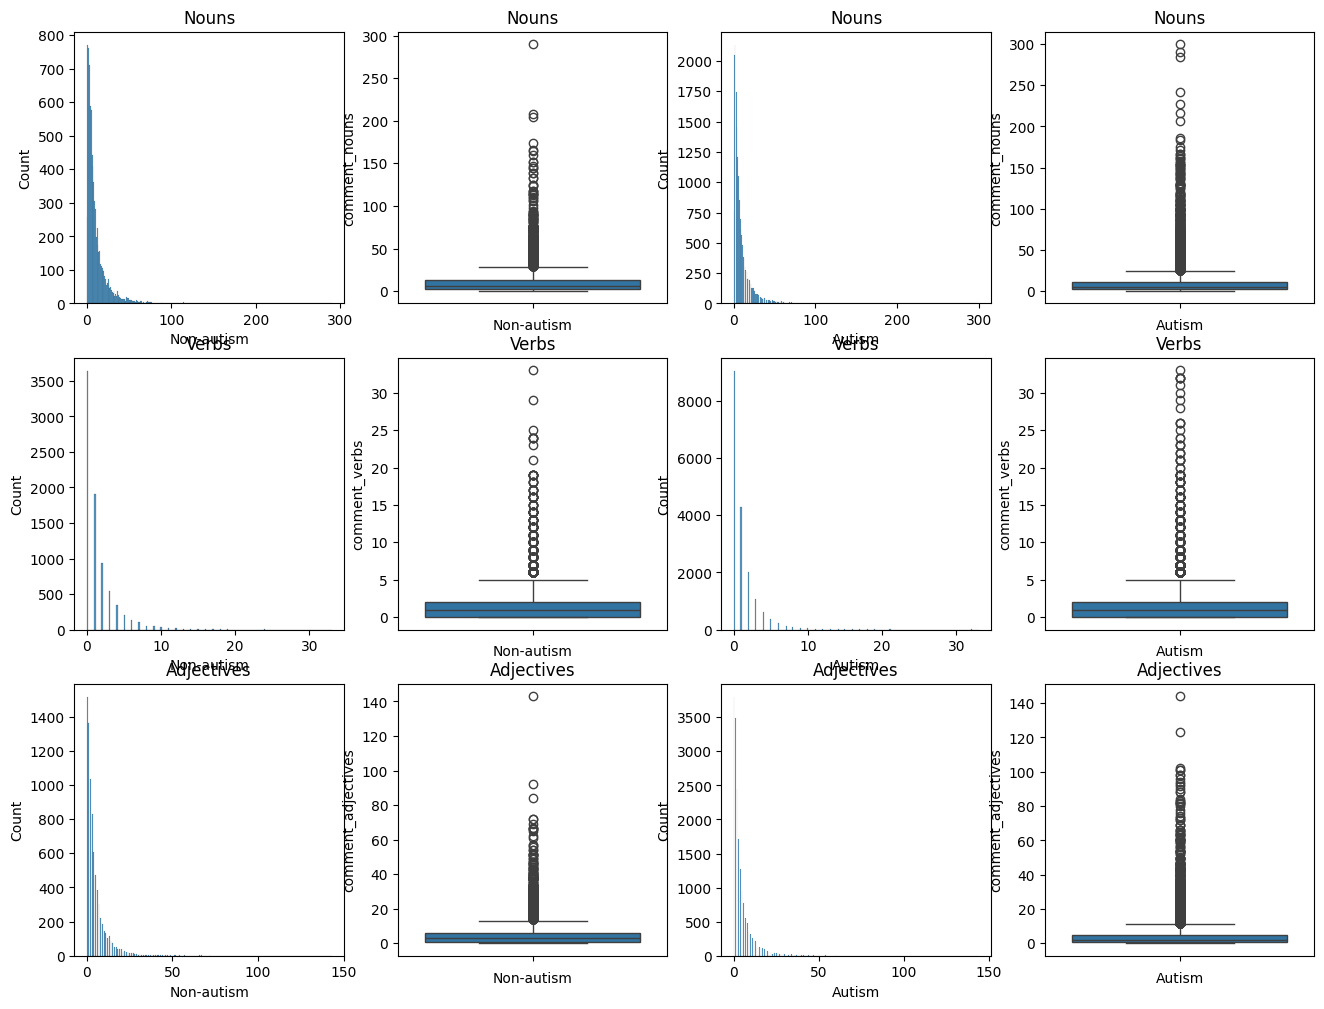

In [ ]:
plt.figure(figsize = (16,12))

plt.subplot(3,4,1)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['comment_nouns'])
plt.xlabel('Non-autism')
plt.title('Nouns')

plt.subplot(3,4,2)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['comment_nouns'])
plt.xlabel('Non-autism')
plt.title('Nouns')

plt.subplot(3,4,3)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['comment_nouns'])
plt.xlabel('Autism')
plt.title('Nouns')

plt.subplot(3,4,4)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['comment_nouns'])
plt.xlabel('Autism')
plt.title('Nouns')

plt.subplot(3,4,5)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['comment_verbs'])
plt.xlabel('Non-autism')
plt.title('Verbs')

plt.subplot(3,4,6)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['comment_verbs'])
plt.xlabel('Non-autism')
plt.title('Verbs')

plt.subplot(3,4,7)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['comment_verbs'])
plt.xlabel('Autism')
plt.title('Verbs')

plt.subplot(3,4,8)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['comment_verbs'])
plt.xlabel('Autism')
plt.title('Verbs')

plt.subplot(3,4,9)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['comment_adjectives'])
plt.xlabel('Non-autism')
plt.title('Adjectives')

plt.subplot(3,4,10)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==0]['comment_adjectives'])
plt.xlabel('Non-autism')
plt.title('Adjectives')

plt.subplot(3,4,11)
sns.histplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['comment_adjectives'])
plt.xlabel('Autism')
plt.title('Adjectives')

plt.subplot(3,4,12)
sns.boxplot(autism_data_filter[autism_data_filter['final_autism_ind']==1]['comment_adjectives'])
plt.xlabel('Autism')
plt.title('Adjectives')

plt.show()

In [ ]:
autism_data_filter['comment_author'].groupby(autism_data_filter['final_autism_ind']).count()

final_autism_ind
0     8063
1    18115
Name: comment_author, dtype: int64